<a href="https://colab.research.google.com/github/Akorn95/Avito/blob/master/Avito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.weightstats import *
from datetime import datetime

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Загрузка данных

## tickets

In [3]:
tickets=pd.read_csv('/content/drive/My Drive/Avito/support_tickets.csv')
print(tickets.info())
tickets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397530 entries, 0 to 397529
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user_id             397530 non-null  object
 1   ticket_category     397530 non-null  object
 2   ticket_subcategory  397530 non-null  object
 3   current_state       397530 non-null  object
 4   request_id          397530 non-null  object
 5   activity_start_dt   397530 non-null  object
 6   fact_reaction_dt    397530 non-null  object
dtypes: object(7)
memory usage: 21.2+ MB
None


,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00


In [0]:
tickets['activity_start_dt']=pd.to_datetime(tickets['activity_start_dt'])
tickets['fact_reaction_dt']=pd.to_datetime(tickets['fact_reaction_dt'])


## new_items

In [5]:
new_items=pd.read_csv('/content/drive/My Drive/Avito/new_items_by_support_users.csv')
print(new_items.info())
new_items.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18559923 entries, 0 to 18559922
Data columns (total 7 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   user_id                  object
 1   user_registration_time   object
 2   user_first_listing_date  object
 3   item_id                  object
 4   item_starttime           object
 5   item_category            object
 6   item_subcategory         object
dtypes: object(7)
memory usage: 991.2+ MB
None


,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили
1,6 790 750 024,2013-12-14 23:05:15,2013-12-14 23:27:04,8 525 000 013,2014-01-01 02:45:56,Транспорт,Запчасти и аксессуары
2,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,8 527 000 043,2014-01-01 03:29:44,Транспорт,Автомобили
3,506 779,2011-08-14 06:19:11,2011-08-14 06:50:04,8 530 000 039,2014-01-01 04:34:51,Личные вещи,Красота и здоровье
4,766 896,2013-05-17 11:32:13,2013-06-05 06:05:09,8 534 500 187,2014-01-01 06:07:58,Недвижимость,"Дома, дачи, коттеджи"


In [0]:
new_items['item_starttime']=pd.to_datetime(new_items['item_starttime'])
new_items['user_registration_time']=pd.to_datetime(new_items['user_registration_time'])

##users_evaluation

In [7]:
users_evaluation=pd.read_csv('/content/drive/My Drive/Avito/users_evaluation_of_satisfaction.csv')
print(users_evaluation.info())
users_evaluation.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217533 entries, 0 to 217532
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   request_id                217414 non-null  object
 1   result_mentioned_by_user  217533 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB
None


,request_id,result_mentioned_by_user
0,09e34912-b4df-4e91-b3e0-35b40fe6b9b8,Не удовлетворительно
1,76099bef-7ab3-4a01-96c3-4c06f4032a7e,Не удовлетворительно
2,70acfed6-8897-4e38-a407-65150e7a4395,Удовлетворительно
3,64c7a6c8-8bfe-4f35-b662-9091b3472e6f,Не удовлетворительно
4,b08d9414-7167-4f7f-9837-fe6e535f4fb6,Не удовлетворительно


# Обработка и исследование данных

Соединим оценки пользователей и обращения. Без информации из support_tickets невозможно соотнести оценку по запросу с пользователем, поэтому сделаем только left join

У меня есть подозрение, что тикеты с отзывами, которых нет в tickets то не решенные проблемы с плохими оценками


In [0]:
tickets=pd.merge(tickets,users_evaluation, how='outer', on='request_id')

In [9]:
tickets.info()
tickets.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494641 entries, 0 to 494640
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   user_id                   400844 non-null  object        
 1   ticket_category           400844 non-null  object        
 2   ticket_subcategory        400844 non-null  object        
 3   current_state             400844 non-null  object        
 4   request_id                494522 non-null  object        
 5   activity_start_dt         400844 non-null  datetime64[ns]
 6   fact_reaction_dt          400844 non-null  datetime64[ns]
 7   result_mentioned_by_user  217533 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 34.0+ MB


,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,NaN
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,NaN
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,NaN
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,NaN


In [0]:
tickets['current_state'].fillna('не решено', inplace=True)
tickets['result_mentioned_by_user'].fillna("без оценки", inplace=True)

Text(0.5, 1.0, 'статус -  решено')

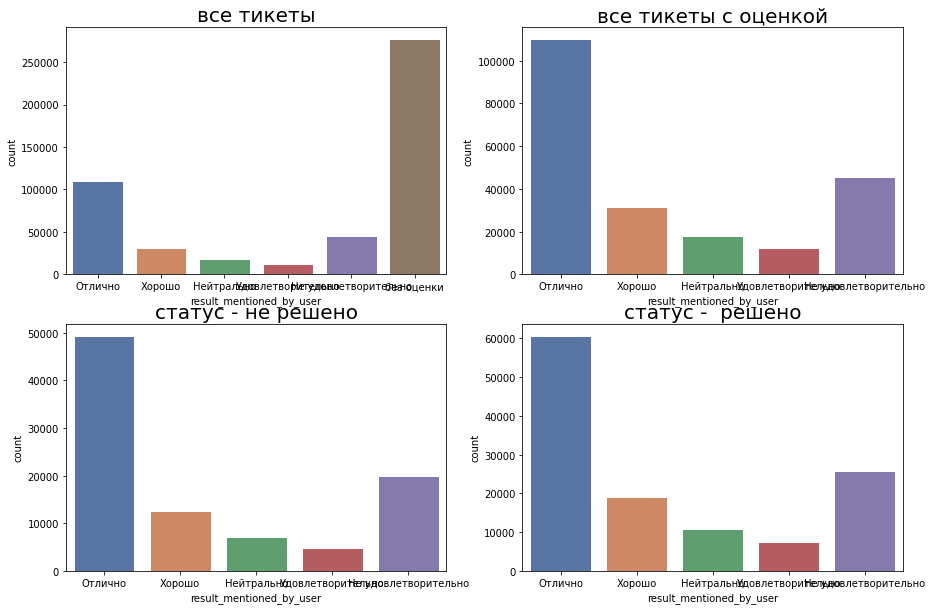

In [11]:
order=['Отлично', 'Хорошо', 'Нейтрально', 'Удовлетворительно', 'Не удовлетворительно','без оценки']
fig, axes = plt.subplots(2,2,figsize=(15, 10))
sns.set(font_scale=0.1)
sns.countplot(tickets['result_mentioned_by_user'], order=order, ax=axes[0,0]).set_title("все тикеты", size=20 )
sns.countplot(tickets['result_mentioned_by_user'], order=order[:-1], ax=axes[0,1]).set_title("все тикеты с оценкой", size=20 )
sns.countplot(tickets[tickets['current_state']=='не решено']['result_mentioned_by_user'], order=order[:-1], ax=axes[1,0]).set_title("статус - не решено", size=20 )
sns.countplot(tickets[tickets['current_state']=='Решено']['result_mentioned_by_user'], order=order[:-1], ax=axes[1,1]).set_title("статус -  решено", size=20 )

посмотрим на распределение оценок по тикетам. 

Большинство просто не дает фид-бек по работе поддержки.

Есть три варианта обработки подобной ситуации:

1) попытаться спрогнозировать оценку пользователя, но это доолнительное исследование;

2) отнести оценку к "нейтрально", т.к. клиент явно не выразил свое мнение, но это большой дисбаланс;

3) не учитывать эти данные при определении лояльности клиента.

Плюс ко всему не решенные тикеты нельзя соотнести с пользователем потому их тоже выкинем

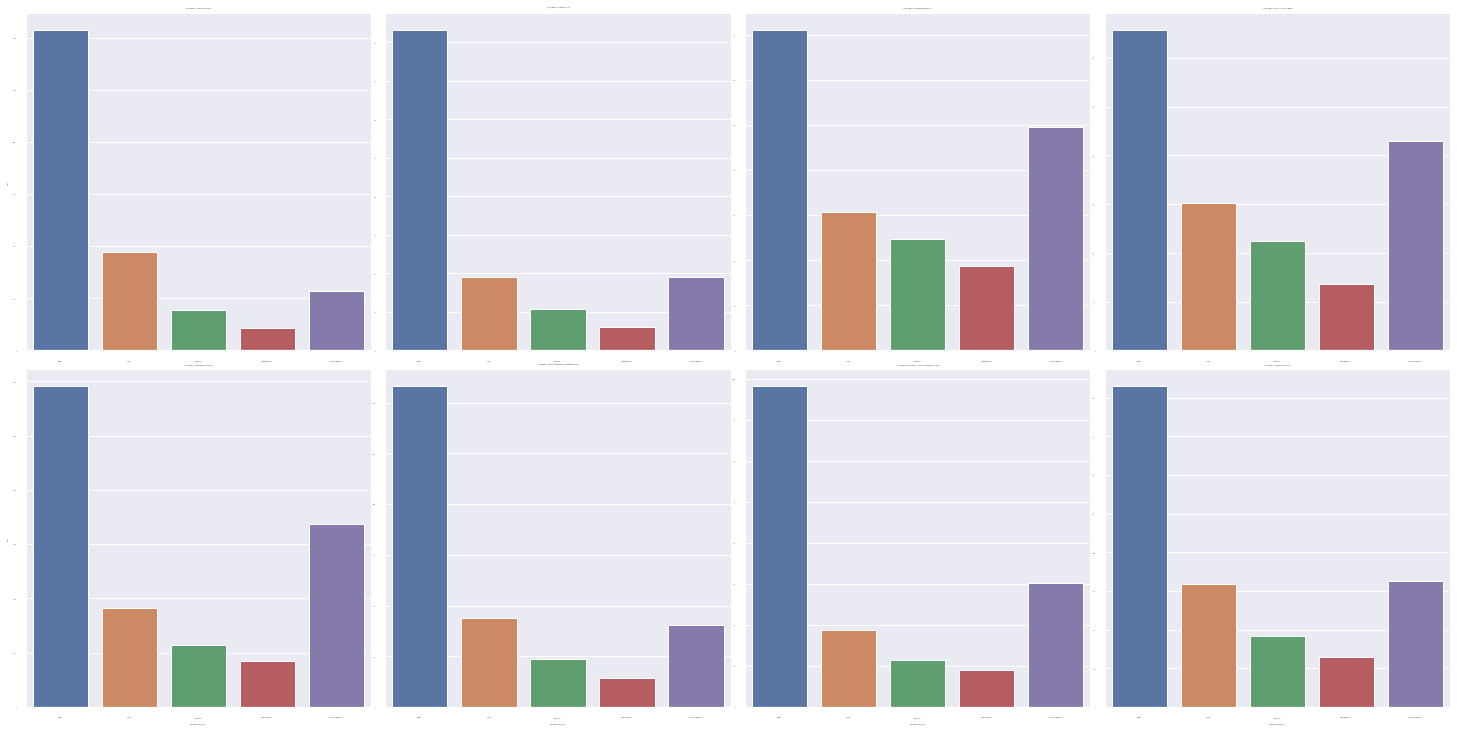

In [12]:
sns.catplot(data=tickets[tickets['current_state']=='Решено'], x='result_mentioned_by_user', order=order[:-1], col='ticket_category',kind="count", col_wrap=4, sharey=False, sharex=False)

Что надо сравнить

что брать за метрику лояльности: создание нового объяввления в течении n месяцев после последнего назвать то удержанием?

думаю надо сравнить три вещи

1) отток клиентов, не обращавшихся в поддержку

2) отток клиентов обращавшихся в поддержку и удовлетворенный/нет результатом

3) то можно сравнить в разрезе 6-ти оценок

4) то можно сравнить в разрезе категорий

т.е. множественная проверка гипотез среднего числа дней (или оттока за период n) для разных групп о равенстве среднего?


In [0]:
item_count=new_items['user_id'].value_counts(dropna=False).values

In [14]:
new_items['item_starttime'].min()

Timestamp('2014-01-01 00:02:29')

In [15]:
new_items['item_starttime'].max()

Timestamp('2016-03-31 23:59:47')

In [16]:
tickets[tickets['current_state']=='Решено']['activity_start_dt'].min()

Timestamp('2015-08-14 18:34:00')

In [17]:
tickets[tickets['current_state']=='Решено']['activity_start_dt'].max()

Timestamp('2015-12-31 22:32:00')

# Обработка тикетов

попробуем посмотреть среднее число объявлений клиента до и после обращения в поддержку за 90 дней. каждое обращение - одна строка

In [18]:
solve_tickets=tickets[tickets['current_state']=='Решено']
print(len(solve_tickets))
solve_tickets.head()

400844


,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,без оценки
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,без оценки
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,без оценки
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,без оценки


In [19]:
%%time
solve_tickets_merge=pd.merge(solve_tickets,new_items, how='left', on='user_id')

CPU times: user 1min 7s, sys: 9.38 s, total: 1min 17s
Wall time: 1min 17s


In [0]:
before=solve_tickets_merge[((solve_tickets_merge['activity_start_dt']-solve_tickets_merge['item_starttime'])<=pd.Timedelta(days=90))&\
                           ((solve_tickets_merge['activity_start_dt']-solve_tickets_merge['item_starttime'])>=pd.Timedelta(days=0))]

after=solve_tickets_merge[((solve_tickets_merge['activity_start_dt']-solve_tickets_merge['item_starttime'])>=pd.Timedelta(days=-90))&\
                           ((solve_tickets_merge['activity_start_dt']-solve_tickets_merge['item_starttime'])<=pd.Timedelta(days=0))]                           

In [0]:
before_group=before[['request_id', 'user_id']].groupby(['request_id']).count().rename(columns={"user_id": "count_before"})
after_group=after[['request_id', 'user_id']].groupby(['request_id']).count().rename(columns={"user_id": "count_after"})

In [0]:
solve_tickets=pd.merge(solve_tickets,before_group, how='left', on='request_id')
solve_tickets=pd.merge(solve_tickets,after_group, how='left', on='request_id')

In [0]:
solve_tickets['count_before'].fillna(0, inplace=True)
solve_tickets['count_after'].fillna(0, inplace=True)

In [0]:
print(len(solve_tickets))
solve_tickets.head()

400844


,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,count_before,count_after
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6.0,7.0
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,без оценки,1.0,5.0
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,без оценки,1.0,27.0
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,без оценки,0.0,0.0
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,без оценки,2.0,2.0


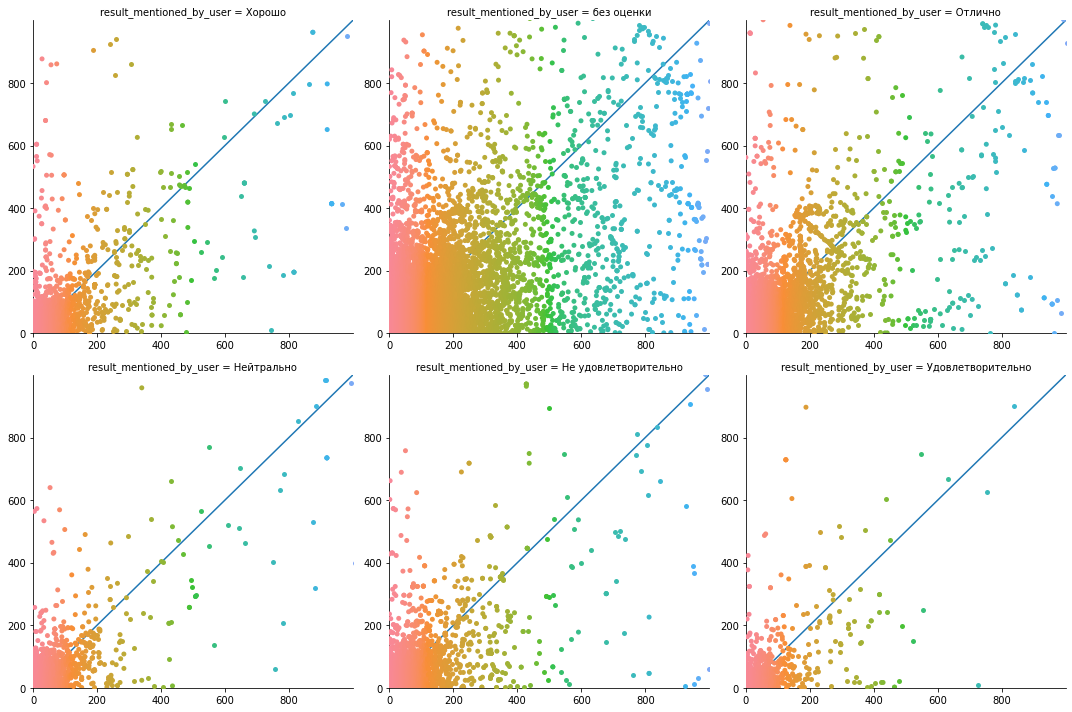

In [0]:
g=sns.catplot(data=solve_tickets, x='count_before', y='count_after',  col='result_mentioned_by_user', col_wrap=3,
              sharey=False, sharex=False).set(xlim=(0, 1000), ylim=(0, 1000), xticks=range(0,1000,200), yticks=range(0,1000,200)
              ).set_xticklabels(range(0,1000,200))

g.map(sns.lineplot, x=[0,1000], y=[0,1000])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


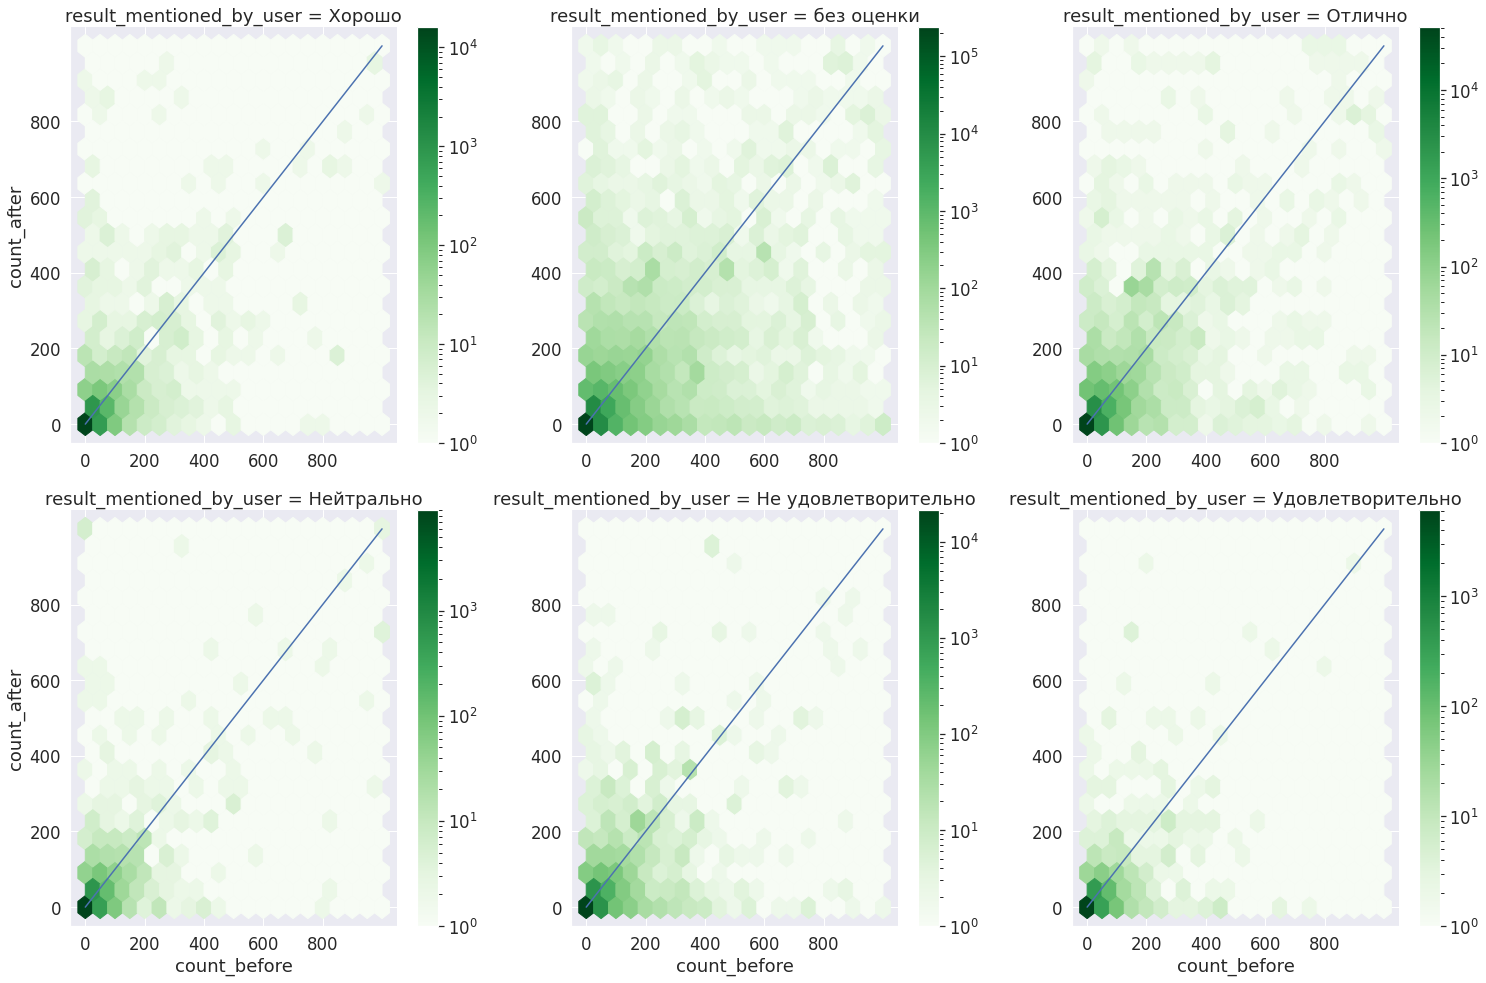

In [0]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=20, reduce_C_function=np.mean, cmap=plt.cm.Greens, bins='log', **kwargs)
    plt.colorbar()
sns.set(font_scale=1.5) 
g = sns.FacetGrid(solve_tickets,  col="result_mentioned_by_user", col_wrap=3, size=7,
                  sharey=False, sharex=False).set(xticks=range(0,1000,200), yticks=range(0,1000,200)
              )
g.map(sns.lineplot, x=[0,1000], y=[0,1000])
g.map(hexbin, 'count_before', 'count_after', extent=[0, 1000, 0, 1000])



In [82]:
solve_tickets['div']=np.log((solve_tickets.count_after+1e-1)/(solve_tickets.count_before+1e-1))
solve_tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,count_before,count_after,div
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6.0,7.0,0.151806
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,без оценки,1.0,5.0,1.533930
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,без оценки,1.0,27.0,3.204224
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,без оценки,0.0,0.0,0.000000
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,без оценки,2.0,2.0,0.000000


(array([9.60000e+01, 1.17300e+03, 8.34800e+03, 5.82510e+04, 9.34140e+04,
        1.88315e+05, 4.36170e+04, 7.23400e+03, 3.78000e+02, 1.80000e+01]),
 array([-11.4490374 ,  -9.17387495,  -6.8987125 ,  -4.62355006,
         -2.34838761,  -0.07322516,   2.20193729,   4.47709973,
          6.75226218,   9.02742463,  11.30258708]),
 <a list of 10 Patch objects>)

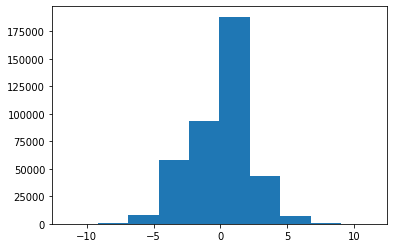

In [83]:
plt.hist(solve_tickets['div'])

In [89]:
print('mark: Общее\navg_div: %.2f\n95%% confidence interval: [%.2f, %.2f]\n'%(solve_tickets['div'].mean(),  *zconfint(solve_tickets['div'])))
for mark in order:
  print('mark: %s\navg_div: %.2f\n95%% confidence interval: [%.2f, %.2f]\n'%(mark, \
        solve_tickets[solve_tickets['result_mentioned_by_user']==mark]['div'].mean(), \
        *zconfint(solve_tickets[solve_tickets['result_mentioned_by_user']==mark]['div'])))

mark: Общее
avg_div: -0.24
95% confidence interval: [-0.24, -0.23]

mark: Отлично
avg_div: 0.04
95% confidence interval: [0.02, 0.06]

mark: Хорошо
avg_div: -0.17
95% confidence interval: [-0.20, -0.15]

mark: Нейтрально
avg_div: -0.29
95% confidence interval: [-0.33, -0.26]

mark: Удовлетворительно
avg_div: -0.43
95% confidence interval: [-0.47, -0.38]

mark: Не удовлетворительно
avg_div: -0.55
95% confidence interval: [-0.57, -0.52]

mark: без оценки
avg_div: -0.27
95% confidence interval: [-0.27, -0.26]



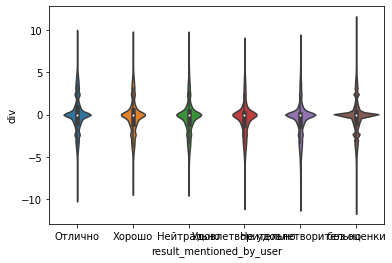

In [95]:
sns.violinplot(data=solve_tickets, x='result_mentioned_by_user', y='div', order=order)

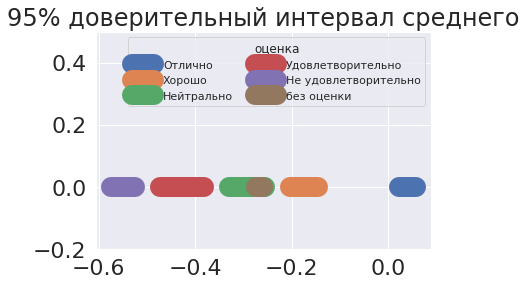

In [154]:
sns.set(font_scale=2, rc={"lines.linewidth": 20}, )

for mark in order:
        g=sns.lineplot(x=zconfint(solve_tickets[solve_tickets['result_mentioned_by_user']==mark]['div']), y=[0,0], ).set_title('95% доверительный интервал среднего')
plt.legend(title='оценка', loc='upper right', labels=order, ncol=2, fontsize =11)
#plt.xlim(-1, 1)

plt.ylim(-0.2, 0.5)
plt.show(g)

1)

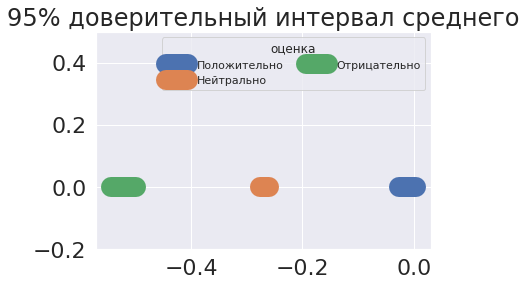

In [165]:
sns.set(font_scale=2, rc={"lines.linewidth": 20}, )


g=sns.lineplot(x=zconfint(solve_tickets[(solve_tickets['result_mentioned_by_user'] == 'Отлично') |  (solve_tickets['result_mentioned_by_user'] == 'Хорошо')]['div']), y=[0,0], ).set_title('95% доверительный интервал среднего')
g=sns.lineplot(x=zconfint(solve_tickets[(solve_tickets['result_mentioned_by_user'] == 'Нейтрально')| (solve_tickets['result_mentioned_by_user'] == 'без оценки')]['div']), y=[0,0], ).set_title('95% доверительный интервал среднего')
g=sns.lineplot(x=zconfint(solve_tickets[(solve_tickets['result_mentioned_by_user'] == 'Удовлетворительно') |  (solve_tickets['result_mentioned_by_user'] == 'Не удовлетворительно')]['div']), y=[0,0], ).set_title('95% доверительный интервал среднего')
plt.legend(title='оценка', loc='upper right', labels=['Положительно', 'Нейтрально', 'Отрицательно'], ncol=2, fontsize =11)
#plt.xlim(-1, 1)

plt.ylim(-0.2, 0.5)
plt.show(g)

оценки *среднего*

In [0]:
m_pos=solve_tickets[(solve_tickets['result_mentioned_by_user'] == 'Отлично') |  (solve_tickets['result_mentioned_by_user'] == 'Хорошо')]['div'].mean()
m_ind=solve_tickets[(solve_tickets['result_mentioned_by_user'] == 'Нейтрально')| (solve_tickets['result_mentioned_by_user'] == 'без оценки')]['div'].mean()
m_neg=solve_tickets[(solve_tickets['result_mentioned_by_user'] == 'Удовлетворительно') |  (solve_tickets['result_mentioned_by_user'] == 'Не удовлетворительно')]['div'].mean()

In [0]:
solve_tickets['scen_1']=np.exp(solve_tickets.apply(lambda x: x['div'] if (x.result_mentioned_by_user == 'Отлично') or  (x.result_mentioned_by_user == 'Хорошо') or\
                                            (x.result_mentioned_by_user == 'Нейтрально') or  (x.result_mentioned_by_user == 'без оценки')\
                                         else x['div'] + m_ind- m_neg , axis=1))*(solve_tickets['count_before']+1e-1)-1e-1

In [0]:
solve_tickets['scen_2']=np.exp(solve_tickets.apply(lambda x: x['div'] if (x.result_mentioned_by_user == 'Отлично') or  (x.result_mentioned_by_user == 'Хорошо')\
                                                             else (x['div'] + m_pos - m_ind if  (x.result_mentioned_by_user == 'Нейтрально') or  (x.result_mentioned_by_user == 'без оценки')\
                                                              else x['div'] + m_ind- m_neg) , axis=1))*(solve_tickets['count_before']+1e-1)-1e-1

In [0]:
solve_tickets['scen_3']=np.exp(solve_tickets.apply(lambda x: x['div'] if (x.result_mentioned_by_user == 'Отлично') or  (x.result_mentioned_by_user == 'Хорошо')\
                                                             else (x['div'] + m_pos - m_ind if  (x.result_mentioned_by_user == 'Нейтрально') or  (x.result_mentioned_by_user == 'без оценки')\
                                                              else x['div'] + m_pos- m_neg) , axis=1))*(solve_tickets['count_before']+1e-1)-1e-1

In [0]:
sums=solve_tickets[['count_after', 'scen_1', 'scen_2', 'scen_3']].sum(axis=0)

In [229]:
print('Не дополучено объявлений:\nсценарий 1: %d%%\nсценарий 2: %d%%\nсценарий 3: %d%%' % ((sums[1]-sums[0])/sums[0]*100, (sums[2]-sums[0])/sums[0]*100, (sums[3]-sums[0])/sums[0]*100))

Не доолучено объявлений:
сценарий 1: 3%
сценарий 2: 22%
сценарий 3: 26%


In [270]:
data_2015Q4=solve_tickets[(solve_tickets['activity_start_dt'].max()-solve_tickets['activity_start_dt']<=pd.Timedelta(days=90))&\
              (solve_tickets['activity_start_dt'].max()-solve_tickets['activity_start_dt']>=pd.Timedelta(days=0))]
data_2015Q4.sort_values(by='activity_start_dt', inplace=True)
print(data_2015Q4['count_after'].sum())
data_2015Q4.drop_duplicates('user_id', keep='last', inplace=True) 
print(data_2015Q4['count_after'].sum())                       

4191219.0
1899934.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
sums_2015Q4=data_2015Q4[['count_after', 'scen_1', 'scen_2', 'scen_3']].sum(axis=0)

In [272]:
print('Не дополучено объявлений:\nсценарий 1: %d%%\nсценарий 2: %d%%\nсценарий 3: %d%%' % ((sums_2015Q4[1]-sums_2015Q4[0])/sums_2015Q4[0]*100,
                                            (sums_2015Q4[2]-sums_2015Q4[0])/sums_2015Q4[0]*100, (sums_2015Q4[3]-sums_2015Q4[0])/sums_2015Q4[0]*100))

Не дополучено объявлений:
сценарий 1: 2%
сценарий 2: 23%
сценарий 3: 26%


In [273]:
print('Не дополучено объявлений:\nсценарий 1: %d\nсценарий 2: %d\nсценарий 3: %d' % ((sums_2015Q4[1]-sums_2015Q4[0]), (sums_2015Q4[2]-sums_2015Q4[0]), (sums_2015Q4[3]-sums_2015Q4[0])))

Не дополучено объявлений:
сценарий 1: 47939
сценарий 2: 438007
сценарий 3: 500736


In [0]:
sums_3=len(new_items[(solve_tickets['activity_start_dt'].max()-new_items['item_starttime']<=pd.Timedelta(days=90))&\
              (solve_tickets['activity_start_dt'].max()-new_items['item_starttime']>=pd.Timedelta(days=0))])

In [274]:
print('Не дополучено объявлений:\nсценарий 1: %d%%\nсценарий 2: %d%%\nсценарий 3: %d%%' % ((sums_2015Q4[1]-sums_2015Q4[0])/sums_3*100, (sums_2015Q4[2]-sums_2015Q4[0])/sums_3*100, (sums_2015Q4[3]-sums_2015Q4[0])/sums_3*100))

Не дополучено объявлений:
сценарий 1: 1%
сценарий 2: 13%
сценарий 3: 15%
